In [51]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from models import *

In [76]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')



In [77]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

a['test_acc_array']

test accuracy: 93.78 92.31 88.99 

train loss: 0.001282942761658736 0.001075408751696196 0.004439453469016231


array([12.36, 22.25, 26.04, 34.59, 39.22, 62.68, 66.1 , 67.64, 71.6 ,
       68.18, 69.65, 67.47, 65.81, 76.05, 76.44, 72.21, 77.25, 79.45,
       75.64, 79.09, 77.54, 77.92, 77.77, 79.03, 80.85, 77.69, 82.65,
       81.63, 74.83, 68.76, 81.46, 80.41, 71.22, 79.91, 76.23, 80.68,
       82.64, 75.75, 80.89, 81.41, 78.66, 81.28, 82.27, 79.37, 81.4 ,
       81.73, 70.95, 81.17, 83.93, 79.09, 80.27, 82.24, 79.54, 83.94,
       81.62, 80.24, 80.65, 76.89, 82.75, 78.96, 81.72, 82.41, 80.35,
       80.06, 73.72, 81.36, 82.77, 85.02, 82.  , 82.23, 83.02, 83.76,
       84.18, 81.64, 84.82, 82.61, 83.73, 79.87, 84.65, 83.25, 82.17,
       83.4 , 84.29, 82.84, 78.34, 84.68, 85.96, 81.72, 86.43, 81.22,
       85.56, 86.32, 84.17, 85.57, 86.27, 82.72, 87.09, 87.56, 85.31,
       84.41, 83.68, 85.28, 85.24, 84.74, 85.98, 88.31, 84.82, 87.29,
       88.24, 87.53, 86.11, 88.06, 88.04, 86.84, 86.81, 87.94, 87.29,
       87.56, 85.92, 89.37, 88.2 , 88.69, 88.58, 88.86, 89.89, 86.71,
       87.02, 89.38,

In [78]:
# Loading the nets

net1 = VGG('VGG19')
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = VGG('VGG19')
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = VGG('VGG19')
net3.load_state_dict(c['net'], strict=False)
net3.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [79]:
# # Loading the nets

# net1 = Linear_mnist()
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = Linear_mnist()
# net2.load_state_dict(aaa['net'], strict=False)
# net2.eval()

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(0.8858)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.5141)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.3978)


torch.Size([1, 3, 32, 32])

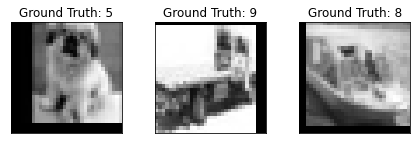

In [80]:
# loading the data

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
crop=32
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
input_dim = [1,3,32,32]
num_classes = 10

transform_train = transforms.Compose([
    transforms.RandomCrop(crop, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [81]:
# c = {} #the difference network
# d = 0
# for i in a['net']:
#     c[i] = a['net'][i]-b['net'][i]
#     d = d + (torch.norm(c[i].type(torch.FloatTensor)))**2

# d

# # net_diff = VGG('VGG19')
# net_diff.load_state_dict(c, strict=False)
# net_diff.eval()

In [82]:
Jac_1 = {}
Jac_2 = {}
Jac_3 = {}
# Jac_diff = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_3[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)
#     Jac_diff[i] = torch.autograd.functional.jacobian(net_diff, example_data[i:i+1,:,:,:], create_graph = True)

In [83]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))), '\n')
    


on the datapoint 0 we have (1/2) tensor(1.1187, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(1.0811, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.0715, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.0726, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(1.1740, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.0987, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(1.1131, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.0760, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.2005, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(1.1328, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.1128, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.0807, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.0978, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [84]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-2)/1', torch.norm(Jac_1[i]-Jac_2[i])/torch.norm(Jac_1[i]))
#     print('on the datapoint', i, 'the difference of the two neural nets is', torch.norm(net_diff(example_data[i:i+1,:,:,:]))/torch.norm(net1(example_data[i:i+1,:,:,:])))

for i in range(20):
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-3)/1', torch.norm(Jac_1[i]-Jac_3[i])/torch.norm(Jac_1[i]))


on the datapoint 0 the difference of the two Jacobians is (1-2)/1 tensor(1.3328, grad_fn=<DivBackward0>)
on the datapoint 1 the difference of the two Jacobians is (1-2)/1 tensor(1.3608, grad_fn=<DivBackward0>)
on the datapoint 2 the difference of the two Jacobians is (1-2)/1 tensor(1.3705, grad_fn=<DivBackward0>)
on the datapoint 3 the difference of the two Jacobians is (1-2)/1 tensor(1.3605, grad_fn=<DivBackward0>)
on the datapoint 4 the difference of the two Jacobians is (1-2)/1 tensor(1.3152, grad_fn=<DivBackward0>)
on the datapoint 5 the difference of the two Jacobians is (1-2)/1 tensor(1.3578, grad_fn=<DivBackward0>)
on the datapoint 6 the difference of the two Jacobians is (1-2)/1 tensor(1.3414, grad_fn=<DivBackward0>)
on the datapoint 7 the difference of the two Jacobians is (1-2)/1 tensor(1.3688, grad_fn=<DivBackward0>)
on the datapoint 8 the difference of the two Jacobians is (1-2)/1 tensor(1.3000, grad_fn=<DivBackward0>)
on the datapoint 9 the difference of the two Jacobians 

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.5141)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.5141)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.1264)


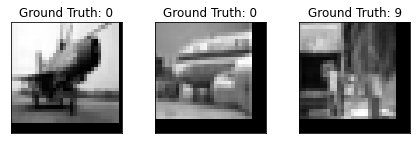

In [85]:
# loading the data - TEST


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(
    testset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()


Jac_4 = {}
Jac_5 = {}
Jac_6 = {}

for i in range(20):
    Jac_4[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_5[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_6[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)

In [86]:

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))), '\n')

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))), '\n')
    


on the datapoint 0 we have (1/2) tensor(1.0885, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(1.0644, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.1281, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.1270, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(1.1516, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.1798, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(1.1230, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.1227, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.1385, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(1.0943, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.1304, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.1920, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.1009, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t